# Assigment 2 - Mod 3
## Brandi Hamming

## Part 2
- For the set of input images for a YOLO classifier, perform image resizing and normalization. Use mean =
[0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225] to "center" your data. Resize to (416, 416).
Turn in your Ipython notebook file that was used for image preprocessing. You could pick your own docker base image.

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 

#### Get Images

In [3]:
def get_images(filename):
    # Given a file name
    # returns a numpy array of the image
    return cv2.imread(filename)

In [4]:
# get bikes
bike1 = get_images('BikeShot1.jpg')
dimensions1 = bike1.shape # height, width, channels

bike2 = get_images('BikeShot2.jpg')
dimensions2 = bike2.shape # height, width, channels

bike3 = get_images('BikeShot3.jpg')
dimensions3 = bike3.shape # height, width, channels

bike4 = get_images('BikeShot4.jpq.png')
dimensions4 = bike4.shape # height, width, channels

## Display Images After Intial Load

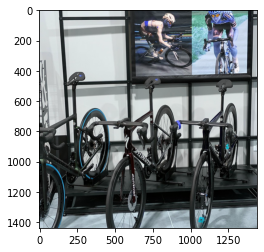

In [5]:
plt.imshow(bike1)

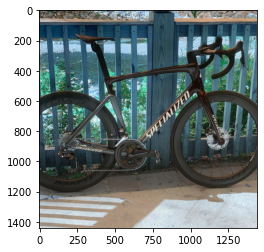

In [7]:
plt.imshow(bike2)

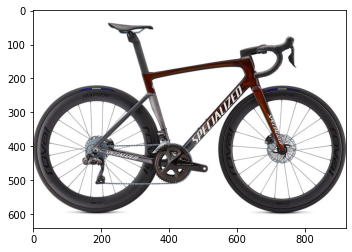

In [8]:
plt.imshow(bike3)

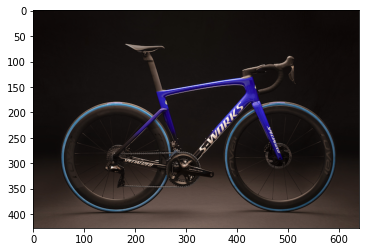

In [9]:
plt.imshow(bike4)

# Transform The Data

### Normalize the Data 
- Uses a z-score
- `(x - mean) / stdev`

In [23]:
def norm_pixel(bike, size=255):
    '''
    Normalizes each pixel to be in range 0-1
    
    bike:numpy array of an image
    size: max pizel size. Default to 255
    Returns a new numpy array in range 0-1
    '''
    divider = np.array(size)
    return bike/divider

In [24]:
def norm(bike, mean, stdev):
    ''' Given a numpy array of an image
    with a list of means and standard deviations
    returns a new numpy array with all fields normalized
    '''
    pixels_normed = norm_pixel(bike)
    sub =  pixels_normed - mean
    zscore = sub /stdev
    return zscore

In [25]:
mean1 = [0.485, 0.456, 0.406] 
std1 =  [0.229, 0.224, 0.225]

# normalize with given values
bike1n = norm(bike1, mean1, std1)
bike2n = norm(bike2, mean1, std1)
bike3n = norm(bike3, mean1, std1)
bike4n = norm(bike4, mean1, std1)

In [26]:
# verify the data

#check the shapes are still the same
assert bike1.shape == bike1n.shape
assert bike2.shape == bike2n.shape
assert bike3.shape == bike3n.shape
assert bike4.shape == bike4n.shape

In [34]:
b1 = ((bike1[0][0] / 255) - mean1) / std1

In [38]:
# check the a handful values are as expected
b1 = ((bike1[0][0] / 255) - mean1) / std1
b2 = ((bike2[0][0] / 255) - mean1) / std1
b3 = ((bike3[2][2] / 255) - mean1) / std1
b4 = ((bike4[100][100] / 255) - mean1) / std1
assert list(bike1n[0][0]) == list(b1)
assert list(bike2n[0][0]) == list(b2)
assert list(bike3n[2][2]) == list(b3)
assert list(bike4n[100][100]) == list(b4)

## Display Images After Normalization

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


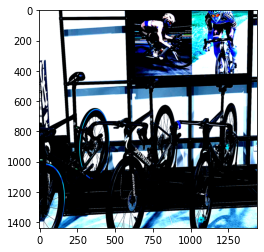

In [39]:
plt.imshow(bike1n)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


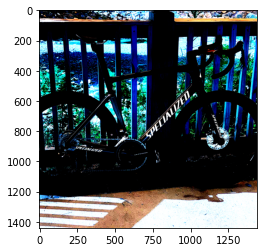

In [40]:
plt.imshow(bike2n)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


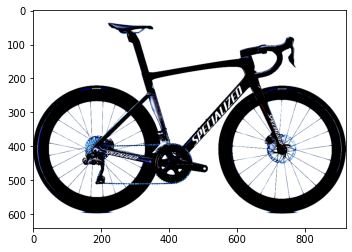

In [42]:
plt.imshow(bike3n)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


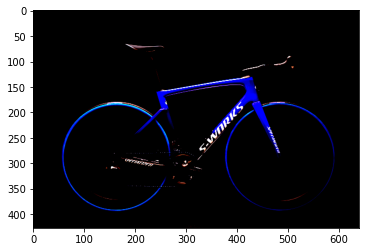

In [43]:
plt.imshow(bike4n)

### Resize Images

In [44]:
def resize_bike(bike, dsize):
    '''
    Given a numpy array of an image and a new shape for the image
    returns the numpy array resized to fit the shape
    '''
    return cv2.resize(bike, dsize, interpolation = cv2.INTER_AREA)

In [45]:
# Resizing each image
dsize = (416, 416)

# resize images using the normalization values provided
bike1_resized = resize_bike(bike1n,dsize)
bike2_resized =  resize_bike(bike2n,dsize)
bike3_resized =  resize_bike(bike3n,dsize)
bike4_resized =  resize_bike(bike4n,dsize)


## Display Images after resizing 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


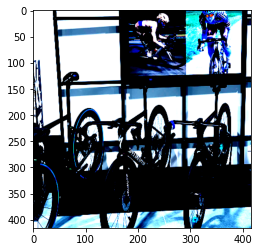

In [46]:
plt.imshow(bike1_resized)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


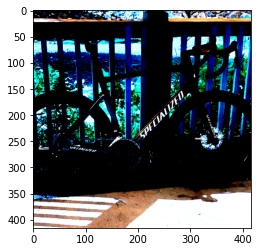

In [48]:
plt.imshow(bike2_resized)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


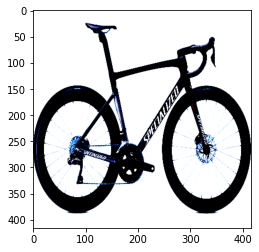

In [49]:
plt.imshow(bike3_resized)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


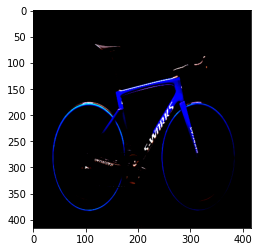

In [50]:
plt.imshow(bike4_resized)

In [51]:
#check the shapes are still the same
new_shape = (416,416,3)
assert bike1_resized.shape == new_shape
assert bike2_resized.shape == new_shape
assert bike3_resized.shape == new_shape
assert bike4_resized.shape == new_shape

# Store the Data into a single list
- Store data to easily feed into a ML model

In [52]:
bikes = np.stack((bike1_resized, bike2_resized, bike3_resized, bike4_resized))
bikes.shape # 4 images, 416x 416 x 3 dimensions

(4, 416, 416, 3)

In [53]:
# check the shape is as expected
assert bikes.shape == (4, 416, 416, 3)